# Generative Model for Classification

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

In [2]:
#populational function
mean = 10
std = 1
x1 = np.random.normal(mean, std, 100)
fx1 = norm.pdf(np.sort(x1), mean, std)

mean = -10
std = 1
x2 = np.random.normal(mean, std, 100)
fx2 = norm.pdf(np.sort(x2), mean, std)

#function
y = x1 + x2 + np.random.rand()

class_y = list(map(lambda y: 'team B' if y >= 0 else 'team A', y))

#plot
import plotly.express as px
fig = px.scatter_3d(x=x1, y=x2, z=y, color=class_y, labels={'x':'x1', 'y':'x2', 'z':'y'})
fig.show()

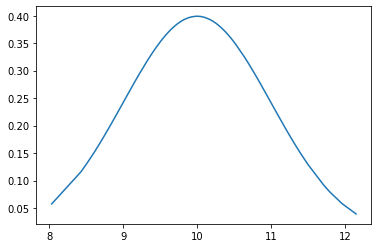

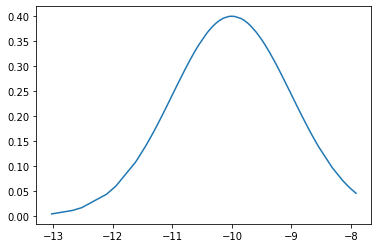

In [3]:
import matplotlib.pyplot as plt
plt.plot(np.sort(x1), fx1)
plt.show()

plt.plot(np.sort(x2), fx2)
plt.show()

In [4]:
#classes
k = ['team A', 'team B']

#conditional probabilities
#prior probabilities
prob_A = class_y.count('team A') / len(class_y)
print(prob_A)
prob_B = class_y.count('team B') / len(class_y)
print(prob_B)

#posterior probabilites (?)
prob_A_given_B = (0.5 * prob_A)/ 0.5
prob_B_given_A = (0.5 * prob_B)/ 0.5
print(prob_A_given_B/(prob_B_given_A + prob_A_given_B))
print(prob_B_given_A/(prob_B_given_A + prob_A_given_B))

#https://analyticsindiamag.com/a-guide-to-bayesian-statistics-in-python-for-beginners/

0.32
0.68
0.32
0.68


In [11]:
#posterior probability is calculated by updating the prior probability using Bayes' theorem
bayer_classifier = (fx1 * prob_A) / (fx2 * prob_B)
class_y_pred = list(map(lambda y: 'team A' if y > 1 else 'team B', bayer_classifier))
precision_score(class_y, class_y_pred, pos_label='team B')

0.6808510638297872

Accuracy: 0.66
Precision: 0.681
Recall: 0.941


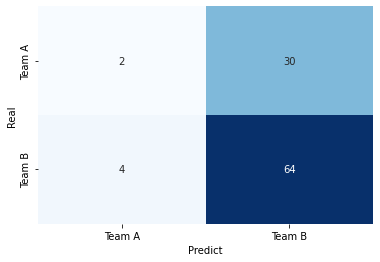

In [15]:
#posterior probability is calculated by updating the prior probability using Bayes' theorem
bayer_classifier = (fx1 * prob_A) / (fx2 * prob_B)
class_y_pred = list(map(lambda y: 'team A' if y > 1 else 'team B', bayer_classifier))

#metrics
def metrics(y, y_pred):
    #role: display metrics of estimation

    print(f'Accuracy: {accuracy_score(y, y_pred).round(3)}')
    print(f"Precision: {precision_score(y, y_pred, pos_label='team B').round(3)}")
    print(f"Recall: {recall_score(y, y_pred, pos_label='team B').round(3)}")

    cmax = confusion_matrix(y, y_pred)
    fig = sns.heatmap(cmax, annot=True,cbar=False, cmap='Blues', xticklabels=['Team A', 'Team B'], yticklabels=['Team A', 'Team B'])
    fig.set(xlabel='Predict', ylabel='Real')
    plt.show()
    
metrics(class_y, class_y_pred)

### Linear Discriminant Analysis